## Introducción
La tienda online Ice vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. En este proyecto se van a identificar patrones que determinen si un juego tiene éxito o no. Esto permitirá detectar proyectos prometedores y planificar campañas publicitarias.
La información se remonta al año 2016 y será de utilidad para proyectar la campaña que se está planeando para 2017.
El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.


## Inicialización

In [3]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Cargar datos

In [5]:
# Carga el DataFrame

df_juegos = pd.read_csv("games.csv")

## Preparar los datos

In [7]:
df_juegos.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3144,NBA Live 06,XB,2005.0,Sports,0.57,0.04,0.0,0.03,79.0,6.4,E
6036,Karaoke Revolution Glee: Volume 3,Wii,2011.0,Misc,0.23,0.04,0.0,0.02,NaN,tbd,T
14167,Asterix & Obelix: Kick Buttix,PS2,2004.0,Action,0.02,0.01,0.0,0.00,NaN,NaN,NaN
15402,Aquanaut's Holiday,PS,1995.0,Adventure,0.01,0.01,0.0,0.00,NaN,NaN,NaN
15369,Guess the Logos,XB,2004.0,Puzzle,0.02,0.00,0.0,0.00,NaN,NaN,NaN


* Ponemos los nombres de las columnas en minúsculas:

In [9]:
# Bucle en los encabezados poniendo todo en minúsculas
new_names = []
for old_name in df_juegos:
    new_names.append(old_name.lower())
    
print(new_names)
df_juegos.columns = new_names

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


In [10]:
df_juegos.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

* Verificamos las filas duplicadas en todo el data set y por columnas específicas.

In [12]:
# Verificamos valores duplicados en todo el data frame:
df_juegos.duplicated().sum()

0

In [13]:
# De acuerdo con la naturaleza de los datos y el contenido, no el lógico que hallan valores duplicados teniendo 
# en cuenta las columnas "name","year_of_release","platform", por eso verificamos los valores duplicados en estas:
df_juegos[df_juegos.duplicated(subset = ["name","year_of_release","platform"])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [14]:
df_juegos[(df_juegos["name"].isna())&(df_juegos["platform"]=="GEN")]

# Después del análisis de estas dos filas, se determina que son diferentes y no se eliminan.

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [15]:
df_juegos[(df_juegos["name"]=="Madden NFL 13")&(df_juegos["platform"]=="PS3")]

# Después del análisis de estas dos filas, se determina que es muy probable que correspondan al mismo dato por tantas,
# similitudes en sus datos, por eso se procede a eliminar la fila 16230.
df_juegos.drop(index=16230, inplace=True)

In [16]:
df_juegos[(df_juegos["name"]=="Madden NFL 13")&(df_juegos["platform"]=="PS3")]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E


In [17]:
# Reseteamos indíces:
df_juegos.reset_index(drop=True)
# Localizamos el nuevo indíce 16230 (solo para comprobar que exista)
df_juegos.iloc[16229]

name               Dr. Slump & Arale-Chan
platform                               DS
year_of_release                    2008.0
genre                           Adventure
na_sales                              0.0
eu_sales                              0.0
jp_sales                             0.01
other_sales                           0.0
critic_score                          NaN
user_score                            NaN
rating                                NaN
Name: 16229, dtype: object

* Verificamos los tipos de datos en cada columna:

In [19]:
df_juegos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16714 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16714 non-null  object 
 2   year_of_release  16445 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16714 non-null  float64
 5   eu_sales         16714 non-null  float64
 6   jp_sales         16714 non-null  float64
 7   other_sales      16714 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       10013 non-null  object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Después de explorar el data frame, se concluye que los tipos de datos de las columnas year_of_release deben ser enteros y de la columna user_score flotantes.

In [21]:
# Columna year_of_release:
# Como tenemos valores ausentes en esta columna vamos a rellenarlos con 0, (se concluye que en las fuentes abierta de 
# información no había información disponible sobre el año de lanzamiento para ciertos juegos) ya que esta columna es númerica.
df_juegos["year_of_release"].fillna(0, inplace=True)
# cambiamos el tipo de la columnna de flotante a entera.
df_juegos["year_of_release"] = df_juegos["year_of_release"].astype("int")

In [22]:
# Columna user_score:
# Ya que esta columna es una calificación no se van a rellenar los valores nulos por cero(0), ya que esto afectaría
# las estadistícas de calificaciones con este valor.
# En esta columna hay un valor "tdb" ó "to be determined" (a determinar), dado que esta columna es númerica se va a
# reemplazar este valor por Nan (nulos) así:

# Forma 1 con replace:

df_juegos["user_score"].replace("tbd", np.nan, inplace=True)

# Forma 2 con un bucle for:

# reemplazo_columna = ["user_score"]
# for value in reemplazo_columna:
#    if value =="tbd":
#        value=np.nan
#        value(inplace=True)

In [23]:
# Columna user_score:
# Después de este reemplazo, convertimos la columna de object a flotante.
df_juegos["user_score"] = df_juegos["user_score"].astype("float")

In [24]:
# Revisamos los valores ausentes de la columna name:
df_juegos[df_juegos["name"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [25]:
# Evidenciamos que los mismos dos valores ausentes de la columna name, son iguales a los de la columna género.
# Para no perder el resto de información de estas dos filas y teniendo en cuenta que los tipos de datos de estas columnas son
# tipo object, vamos a reemplazar los valores ausentes de las columnas nombre y género por "tbd" significa "to be determined" 
# (a determinar)

df_juegos["genre"].fillna("tbd", inplace=True)
df_juegos["name"].fillna("tbd", inplace=True)

In [26]:
# Columna critic_score:
# Ya que esta columna es una calificación no se van a rellenar los valores nulos por cero(0), ya que esto afectaría
# las estadistícas de calificaciones con este valor.

# Columna rating:
# Los valores nulos de esta columna problamente se deben a falta de disponibilidad de información en las fuentes, como 
# esta columna es tipo object reemplazamos los valores ausentes por tbd significa "to be determined" (a determinar).

df_juegos["rating"].fillna("tbd", inplace=True)

# Enriquecer los datos

In [28]:
# Creamos la columna ventas_totales:

df_juegos["total_sales"] = df_juegos["na_sales"] + df_juegos["eu_sales"] + df_juegos["jp_sales"] + df_juegos["other_sales"]

In [29]:
df_juegos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16714 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16714 non-null  object 
 1   platform         16714 non-null  object 
 2   year_of_release  16714 non-null  int32  
 3   genre            16714 non-null  object 
 4   na_sales         16714 non-null  float64
 5   eu_sales         16714 non-null  float64
 6   jp_sales         16714 non-null  float64
 7   other_sales      16714 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   float64
 10  rating           16714 non-null  object 
 11  total_sales      16714 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


# Análisis de datos

Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

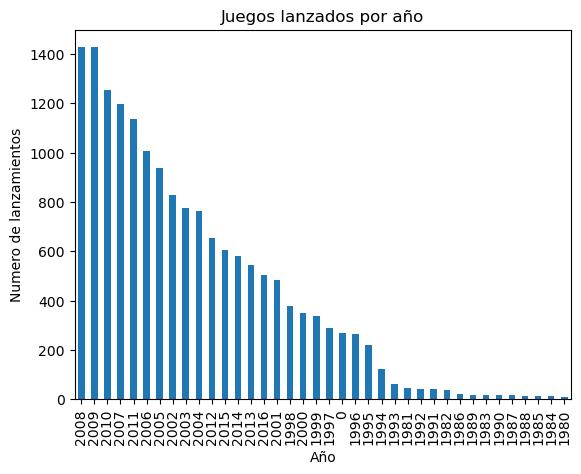

In [32]:
# Creamos un gráfico de barras:
juegos_por_año = df_juegos["year_of_release"].value_counts()
juegos_por_año.plot ( kind = "bar",
                     title = "Juegos lanzados por año",
                     xlabel = "Año",
                     ylabel = "Numero de lanzamientos"
                    )
                   
plt.show()

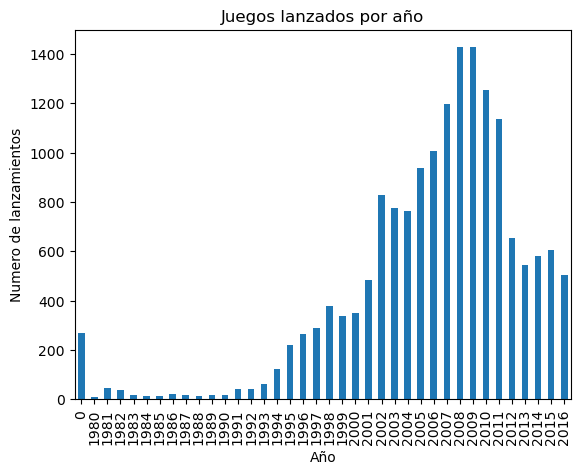

In [33]:
juegos_año = df_juegos.groupby("year_of_release")["year_of_release"].count()
juegos_año.plot ( kind = "bar",
                     title = "Juegos lanzados por año",
                     xlabel = "Año",
                     ylabel = "Numero de lanzamientos"
                    )
                   
plt.show()

* Los años 2008 y 2009 fueron los años con mayores lanzamientos de juegos. En el rango de los años 2002 a 2016 hubo un volumen significativo de lanzamientos de juegos. Pero el mayor volumen fue lanzado entre el 2002-2009, del 2010 al 2016 el volumen de lanzamiento fue disminuyendo.

Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas.

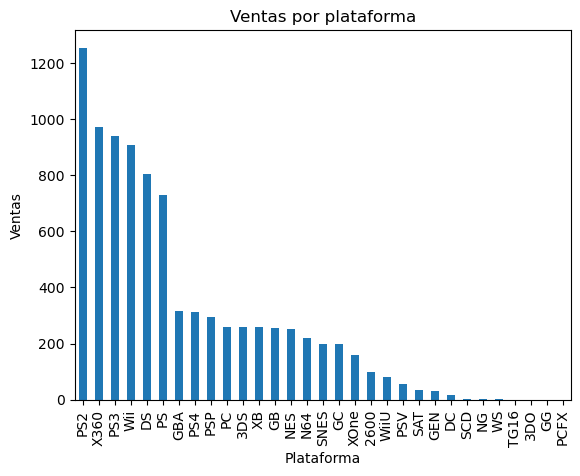

In [36]:
# Creamos un gráfico de barras:
ventas_por_plataforma = df_juegos.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
ventas_por_plataforma.plot ( kind = "bar",
                            title = "Ventas por plataforma",
                         xlabel = "Plataforma",
                            ylabel = "Ventas"
                           )
                   
plt.show()

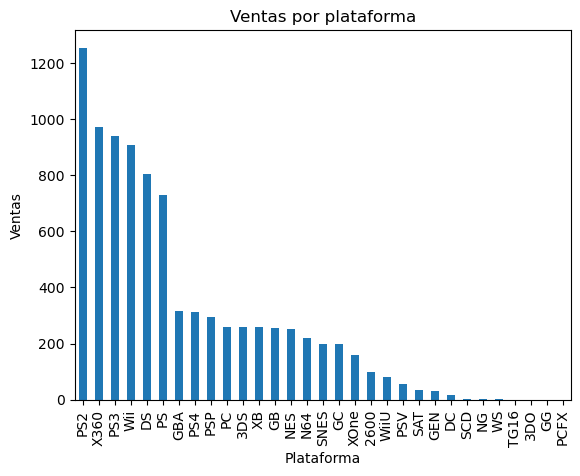

In [37]:
# Creamos un gráfico de barras:
ventas_por_plataforma = df_juegos.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
ventas_por_plataforma.plot ( kind = "bar",
                            title = "Ventas por plataforma",
                            xlabel = "Plataforma",
                            ylabel = "Ventas"
                           )
                   
plt.show()

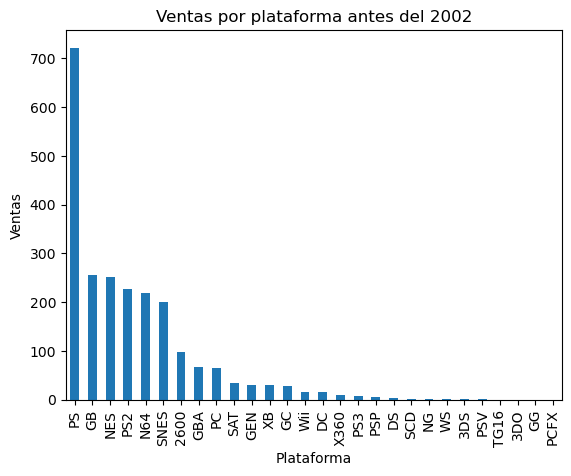

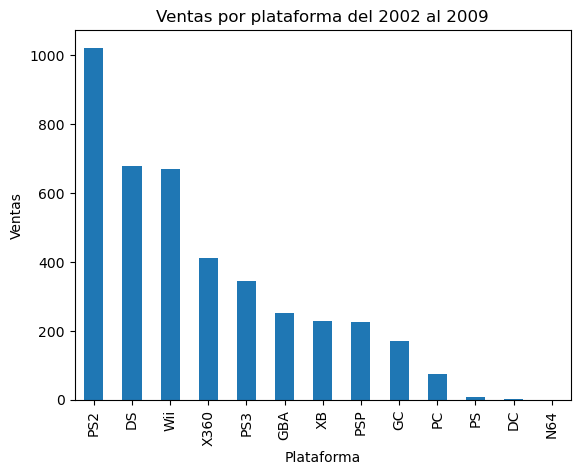

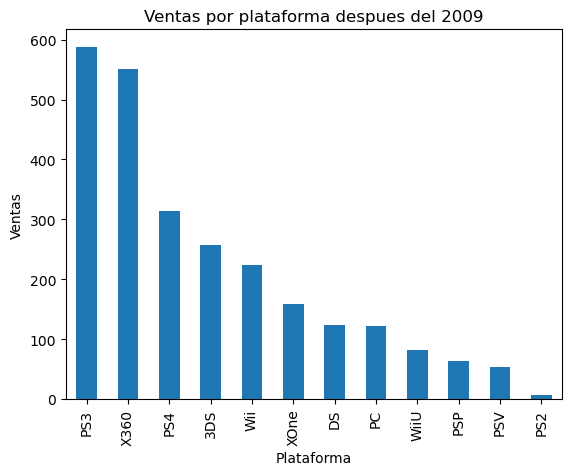

In [38]:
# Visualizamos las ventas por plataforma on los datos segmentados por años:
juegos_antes_2002= df_juegos[(df_juegos["year_of_release"]<2002)]
juegos_2002_2009 = df_juegos[(df_juegos["year_of_release"].isin([2002,2003,2004,2005,2006,2007,2008,2009]))]
juegos_despues_2009 = df_juegos[(df_juegos["year_of_release"].isin([2010,2011,2012,2013,2014,2015,2016]))]

# Creamos un gráfico de barras "Ventas por plataforma antes del 2002":
juegos_antes_2002_ventas = juegos_antes_2002.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
juegos_antes_2002_ventas.plot ( kind = "bar",
                            title = "Ventas por plataforma antes del 2002",
                            xlabel = "Plataforma",
                            ylabel = "Ventas"
                           )
                   
plt.show()

# Creamos un gráfico de barras "Ventas por plataforma del 2002 al 2009":
juegos_2002_2009_ventas = juegos_2002_2009.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
juegos_2002_2009_ventas.plot ( kind = "bar",
                            title = "Ventas por plataforma del 2002 al 2009",
                            xlabel = "Plataforma",
                            ylabel = "Ventas"
                           )
                   
plt.show()

# Creamos un gráfico de barras "Ventas por plataforma del 2002 al 2009":
juegos_despues_2009_ventas = juegos_despues_2009.groupby("platform")["total_sales"].sum().sort_values(ascending=False)
juegos_despues_2009_ventas.plot ( kind = "bar",
                            title = "Ventas por plataforma despues del 2009",
                            xlabel = "Plataforma",
                            ylabel = "Ventas"
                           )
                   
plt.show()

In [39]:
ventas_jugos_concat = pd.concat([juegos_antes_2002_ventas,juegos_2002_2009_ventas,juegos_despues_2009_ventas], axis=1)

In [40]:
ventas_jugos_concat.columns = ["ventas<2002", "ventas_2002_2009", "ventas>2009"]

In [41]:
ventas_jugos_concat.fillna(0, inplace=True)
ventas_jugos_concat

,ventas<2002,ventas_2002_2009,ventas>2009
platform,,,
PS,722.12,8.74,0.00
GB,255.46,0.00,0.00
NES,251.05,0.00,0.00
PS2,227.81,1021.87,6.09
N64,218.60,0.08,0.00
SNES,200.04,0.00,0.00
2600,96.98,0.00,0.00
GBA,66.57,251.28,0.00
PC,63.93,73.63,121.96


In [42]:
# Dividimos nuestro data frame en tres lapsos de tiempo, como se mencionó anteriormente, de acuerdo con su fecha de lanzamiento,
# y se totalizaron las ventas así:

["ventas<2002", "ventas_2002_2009", "ventas>2009"]

# En el periodo (1980-2001), 28 plataformas registraron ventas:
ventas_jugos_concat[(ventas_jugos_concat["ventas<2002"]>0)].count()


ventas<2002         28
ventas_2002_2009    28
ventas>2009         28
dtype: int64

In [43]:
# De esas 28 plataformas, del periodo 2002 al 2009 solo continuaron vendiendo 13 plataformas, cabe aclarar que en el 2002-2009
# no hubieron ventas de nuevas plataformas, es decir las 13 plataformas que vendieron ente 2002-2009 habian vendido entre 1980-2001.
print(ventas_jugos_concat[(ventas_jugos_concat["ventas<2002"]>0) & (ventas_jugos_concat["ventas_2002_2009"]>0)].count())
print()
print(ventas_jugos_concat[(ventas_jugos_concat["ventas_2002_2009"]>0)].count())
print()
print(ventas_jugos_concat[(ventas_jugos_concat["ventas_2002_2009"]>0)])

ventas<2002         13
ventas_2002_2009    13
ventas>2009         13
dtype: int64

ventas<2002         13
ventas_2002_2009    13
ventas>2009         13
dtype: int64

          ventas<2002  ventas_2002_2009  ventas>2009
platform                                            
PS             722.12              8.74         0.00
PS2            227.81           1021.87         6.09
N64            218.60              0.08         0.00
GBA             66.57            251.28         0.00
PC              63.93             73.63       121.96
XB              29.42            228.32         0.00
GC              28.54            170.39         0.00
Wii             16.33            668.21       222.97
DC              15.60              0.35         0.00
X360            10.18            410.83       550.41
PS3              8.31            343.60       587.73
PSP              4.52            225.48        64.05
DS               3.36            679.01       123.75


In [44]:
# En el perido 2010-2016, 12 plataformas registraron ventas 7 de las cuales venian desde periodos anteriores ( es decir que 6 
# plataformas quedaron obsoletas) y 5 plataformas nuevas empezaron a vender en este último periodo:
print(ventas_jugos_concat[(ventas_jugos_concat["ventas>2009"]>0)].count())
print()
print(ventas_jugos_concat[(ventas_jugos_concat["ventas>2009"]>0)])

ventas<2002         12
ventas_2002_2009    12
ventas>2009         12
dtype: int64

          ventas<2002  ventas_2002_2009  ventas>2009
platform                                            
PS2            227.81           1021.87         6.09
PC              63.93             73.63       121.96
Wii             16.33            668.21       222.97
X360            10.18            410.83       550.41
PS3              8.31            343.60       587.73
PSP              4.52            225.48        64.05
DS               3.36            679.01       123.75
3DS              1.19              0.00       257.81
PSV              0.26              0.00        53.81
PS4              0.00              0.00       314.14
XOne             0.00              0.00       159.32
WiiU             0.00              0.00        82.19


In [45]:
# Solo 7 plataformas vendieron y sobrevivieron desde el año 1980 al 2016:
print(ventas_jugos_concat[(ventas_jugos_concat["ventas<2002"]>0) & (ventas_jugos_concat["ventas_2002_2009"]>0)& (ventas_jugos_concat["ventas>2009"]>0)].count())
print()
print(ventas_jugos_concat[(ventas_jugos_concat["ventas<2002"]>0) & (ventas_jugos_concat["ventas_2002_2009"]>0)& (ventas_jugos_concat["ventas>2009"]>0)])

ventas<2002         7
ventas_2002_2009    7
ventas>2009         7
dtype: int64

          ventas<2002  ventas_2002_2009  ventas>2009
platform                                            
PS2            227.81           1021.87         6.09
PC              63.93             73.63       121.96
Wii             16.33            668.21       222.97
X360            10.18            410.83       550.41
PS3              8.31            343.60       587.73
PSP              4.52            225.48        64.05
DS               3.36            679.01       123.75


¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

In [47]:
Top_10_2009 = ventas_jugos_concat.sort_values("ventas>2009", ascending=False)
Top_10_2009.head(10)

,ventas<2002,ventas_2002_2009,ventas>2009
platform,,,
PS3,8.31,343.60,587.73
X360,10.18,410.83,550.41
PS4,0.00,0.00,314.14
3DS,1.19,0.00,257.81
Wii,16.33,668.21,222.97
XOne,0.00,0.00,159.32
DS,3.36,679.01,123.75
PC,63.93,73.63,121.96
WiiU,0.00,0.00,82.19


* De las 10 plataformas top en ventas del 2010 al 2016, 6 son plataformas antiguas que registran ventas desde antes del año 2002.

Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

In [50]:
juegos_df_años = df_juegos.pivot_table(index="year_of_release",columns="platform",values="total_sales",aggfunc=sum)
juegos_df_años.fillna(0,inplace=True)
juegos_df_años.reset_index(inplace=True)

In [51]:
juegos_df_años

platform,year_of_release,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
0,0,10.50,0.00,1.19,0.00,3.34,1.03,4.97,2.20,0.00,...,0.00,0.00,0.00,0.00,0.00,16.33,0.00,10.18,6.17,0.00
1,1980,11.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1981,35.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1982,28.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1983,5.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,1984,0.27,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,1985,0.45,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,1986,0.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,1987,1.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
9,1988,0.74,0.00,0.00,0.00,0.00,1.43,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Diagrama de caja por plataforma, ventas años 2010 al 2016

In [53]:
# Diagrama de caja plataforma PS3, ventas años 2010 al 2016

In [54]:
juegos_despues_2009_ventas_año = juegos_despues_2009.pivot_table(index="year_of_release",columns="platform",values="total_sales",aggfunc=sum)
juegos_despues_2009_ventas_año.fillna(0,inplace=True)
juegos_despues_2009_ventas_año.reset_index(0,inplace=True)

Para el análisis del boxplot solo vamos a tomar plataformas que registren ventas hasta el año 2016, por eso las plataformas DS,PS2 y PSP quedan fuera del análisis.

In [56]:
plataformas_ventas_2016 = juegos_despues_2009.query('platform != "DS" and platform != "PS2" and platform != "PSP"')


In [57]:
plataformas_ventas_2016_año = plataformas_ventas_2016 .pivot_table(index="year_of_release",columns="platform",values="total_sales",aggfunc=sum)
plataformas_ventas_2016_año.fillna(0,inplace=True)
plataformas_ventas_2016_año.reset_index(0,inplace=True)
plataformas_ventas_2016_año

platform,year_of_release,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
0,2010,0.00,24.28,142.17,0.00,0.00,127.95,0.00,170.03,0.00
1,2011,63.20,35.03,156.78,0.00,4.63,59.65,0.00,143.84,0.00
2,2012,51.36,23.22,107.35,0.00,16.19,21.71,17.56,99.74,0.00
3,2013,56.57,12.38,113.25,25.99,10.59,8.59,21.65,88.58,18.96
4,2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
5,2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
6,2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


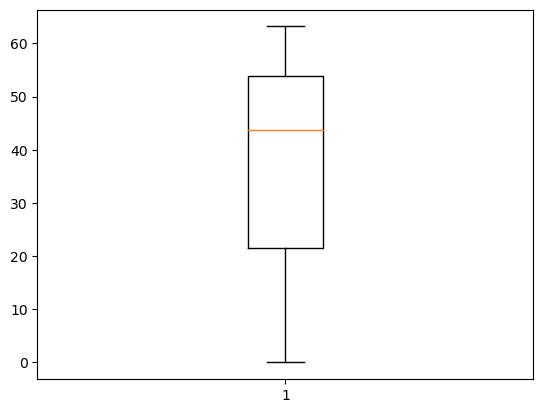

In [58]:
p3ds= plataformas_ventas_2016_año["3DS"]
plt.boxplot(p3ds)
plt.show()

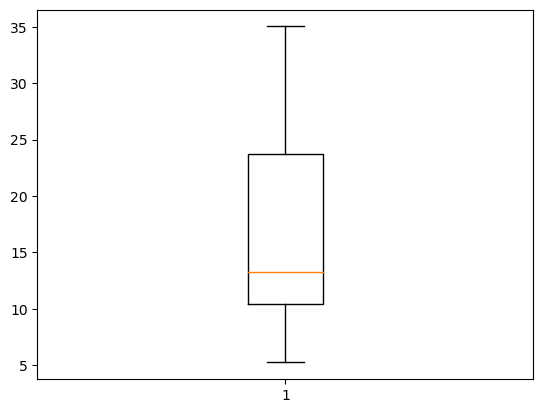

In [59]:
pc = plataformas_ventas_2016_año["PC"]
plt.boxplot(pc)
plt.show()

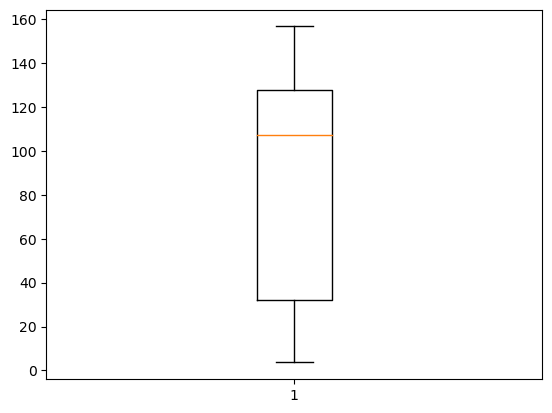

In [60]:
ps3 = plataformas_ventas_2016_año["PS3"]
plt.boxplot(ps3)
plt.show()

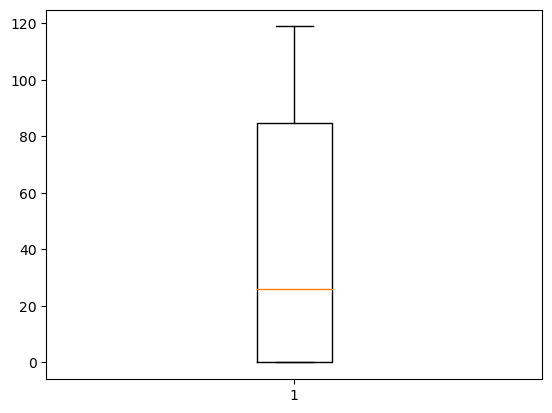

In [61]:
ps4 = plataformas_ventas_2016_año["PS4"]
plt.boxplot(ps4)
plt.show()

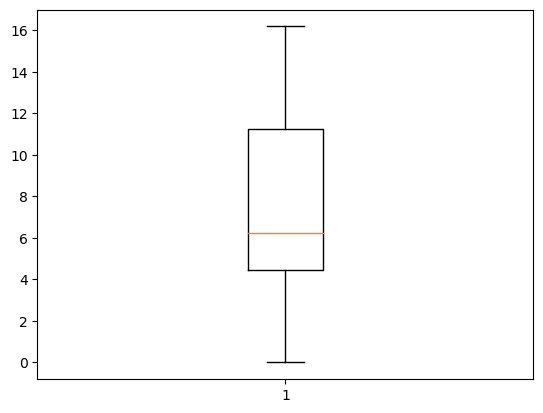

In [62]:
psv = plataformas_ventas_2016_año["PSV"]
plt.boxplot(psv)
plt.show()

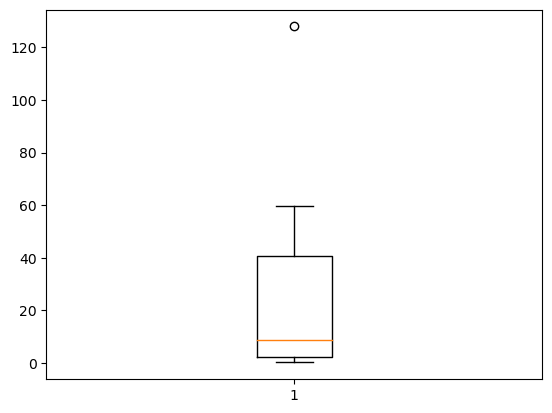

In [63]:
wii = plataformas_ventas_2016_año["Wii"]
plt.boxplot(wii)
plt.show()

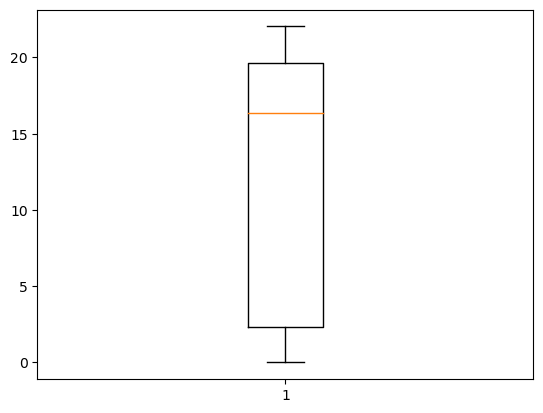

In [64]:
wiiu = plataformas_ventas_2016_año["WiiU"]
plt.boxplot(wiiu)
plt.show()

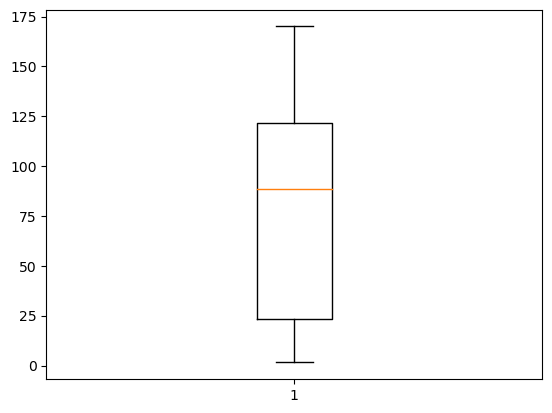

In [65]:
x360 = plataformas_ventas_2016_año["X360"]
plt.boxplot(x360)
plt.show()

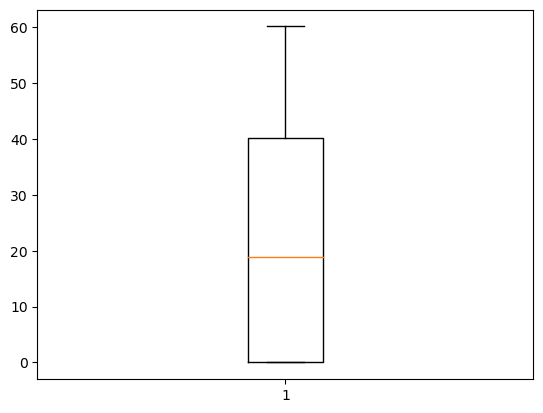

In [66]:
xone = plataformas_ventas_2016_año["XOne"]
plt.boxplot(xone)
plt.show()

In [67]:
plataformas_ventas_2016_año.describe()

platform,year_of_release,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,2013.000000,36.830000,17.422857,83.961429,44.877143,7.687143,31.852857,11.741429,78.630000,22.760000
std,2.160247,23.284465,10.493424,61.062948,50.843792,5.489246,47.236286,9.881392,65.151249,25.682567
min,2010.000000,0.000000,5.250000,3.600000,0.000000,0.000000,0.180000,0.000000,1.520000,0.000000
25%,2011.500000,21.460000,10.450000,32.290000,0.000000,4.440000,2.445000,2.300000,23.350000,0.000000
50%,2013.000000,43.760000,13.280000,107.350000,25.990000,6.250000,8.590000,16.350000,88.580000,18.960000
75%,2014.500000,53.965000,23.750000,127.710000,84.625000,11.245000,40.680000,19.605000,121.790000,40.110000
max,2016.000000,63.200000,35.030000,156.780000,118.900000,16.190000,127.950000,22.030000,170.030000,60.140000


In [68]:
plataformas_ventas_totales_2016 = plataformas_ventas_2016 .pivot_table(index="platform",columns="year_of_release",values="total_sales",aggfunc=sum)
plataformas_ventas_totales_2016.fillna(0,inplace=True)
plataformas_ventas_totales_2016["total_ventas"] = plataformas_ventas_totales_2016[2010]+plataformas_ventas_totales_2016[2011]+plataformas_ventas_totales_2016[2012]+plataformas_ventas_totales_2016[2013]+plataformas_ventas_totales_2016[2014]+plataformas_ventas_totales_2016[2015]+plataformas_ventas_totales_2016[2016]
plataformas_ventas_totales_2016.sort_values(by="total_ventas",inplace= True, ascending=False)
plataformas_ventas_totales_2016.reset_index(inplace=True)
plataformas_ventas_totales_2016

year_of_release,platform,2010,2011,2012,2013,2014,2015,2016,total_ventas
0,PS3,142.17,156.78,107.35,113.25,47.76,16.82,3.60,587.73
1,X360,170.03,143.84,99.74,88.58,34.74,11.96,1.52,550.41
2,PS4,0.00,0.00,0.00,25.99,100.00,118.90,69.25,314.14
3,3DS,0.00,63.20,51.36,56.57,43.76,27.78,15.14,257.81
4,Wii,127.95,59.65,21.71,8.59,3.75,1.14,0.18,222.97
5,XOne,0.00,0.00,0.00,18.96,54.07,60.14,26.15,159.32
6,PC,24.28,35.03,23.22,12.38,13.28,8.52,5.25,121.96
7,WiiU,0.00,0.00,17.56,21.65,22.03,16.35,4.60,82.19
8,PSV,0.00,4.63,16.19,10.59,11.90,6.25,4.25,53.81


* Al revisar la estadística descriptiva en las ventas promedio de los últimos 8 años de estas 9 plataformas, evidenciamos que hay valores extremos y grandes variaciones de un año al otro principalmente en los juegos PS3, X360 y PS4 (las medias vs la desviación estándar nos confirman esta afirmación).
* Las plataformas con ventas más estables en este lapso de tiempo PS, WII y PC.
* Las plataformas con mayores ventas en el 2016 fueron PS4, XOne y 3DS.
* Las plataformas del top 9 con mayores ventas entre 2010-2016 son PS3 y X360, pero desde el año 2014 ambas plataformas han ido disminuyendo sus ventas considerablemente en comparación con el año anterior.
* La plataforma PS4 que es la tercera de este top registra ventas desde el 2013 con crecimiento constante a excepción del año 2016, donde sus ventas disminuyeron en un 42% aproximadamente. La plataforma XOne presentó un comportamiento similar, de los 4 años que ha vendido, creció durante 3 años y el último tuvo disminución en ventas en un 56.5% aproximadamente.
* En el resto de plataformas a nivel general se observa una disminución en ventas durante los últimos 3 años.





Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [71]:
ventas_ps3 = juegos_despues_2009.query('platform=="PS3"')
ventas_juegos_ps3 = ventas_ps3.pivot_table(index="name",values="total_sales", aggfunc="sum")
ventas_juegos_ps3.sort_values(by="total_sales",ascending=False,inplace=True)
ventas_juegos_ps3.head(10)

,total_sales
name,
Grand Theft Auto V,21.05
Call of Duty: Black Ops II,13.79
Call of Duty: Modern Warfare 3,13.33
Call of Duty: Black Ops,12.63
Gran Turismo 5,10.70
Call of Duty: Ghosts,9.36
FIFA Soccer 13,8.17
Battlefield 3,7.17
Uncharted 3: Drake's Deception,6.74


In [72]:
ventas_x360 = juegos_despues_2009.query('platform=="X360"')
ventas_juegos_x360 = ventas_x360.pivot_table(index="name",values="total_sales", aggfunc="sum")
ventas_juegos_x360.sort_values(by="total_sales",ascending=False,inplace=True)
ventas_juegos_x360.head(10)

,total_sales
name,
Kinect Adventures!,21.82
Grand Theft Auto V,16.27
Call of Duty: Modern Warfare 3,14.73
Call of Duty: Black Ops,14.62
Call of Duty: Black Ops II,13.68
Call of Duty: Ghosts,10.24
Halo: Reach,9.86
Halo 4,9.71
Minecraft,9.18


In [73]:
ventas_ps4 = juegos_despues_2009.query('platform=="PS4"')
ventas_juegos_ps4 = ventas_ps4.pivot_table(index="name",values="total_sales", aggfunc="sum")
ventas_juegos_ps4.sort_values(by="total_sales",ascending=False,inplace=True)
ventas_juegos_ps4.head(10)

,total_sales
name,
Call of Duty: Black Ops 3,14.63
Grand Theft Auto V,12.62
FIFA 16,8.58
Star Wars Battlefront (2015),7.98
Call of Duty: Advanced Warfare,7.66
FIFA 17,7.60
Fallout 4,7.17
FIFA 15,6.08
Destiny,5.64


In [74]:
ventas_xone = juegos_despues_2009.query('platform=="XOne"')
ventas_juegos_xone = ventas_xone.pivot_table(index="name",values="total_sales", aggfunc="sum")
ventas_juegos_xone.sort_values(by="total_sales",ascending=False,inplace=True)
ventas_juegos_xone.head(10)

,total_sales
name,
Call of Duty: Black Ops 3,7.39
Grand Theft Auto V,5.47
Call of Duty: Advanced Warfare,5.26
Halo 5: Guardians,4.49
Fallout 4,4.22
Star Wars Battlefront (2015),3.66
Assassin's Creed: Unity,3.50
Destiny,3.37
Gears of War: Ultimate Edition,3.28


In [75]:
juegos_plataforma_concat=pd.concat([ventas_juegos_ps3,ventas_juegos_x360, ventas_juegos_ps4, ventas_juegos_xone],axis=1)
juegos_plataforma_concat.columns=(["ps3","x360","ps4","xone"])
juegos_plataforma_concat.head(10)

,ps3,x360,ps4,xone
name,,,,
Grand Theft Auto V,21.05,16.27,12.62,5.47
Call of Duty: Black Ops II,13.79,13.68,NaN,NaN
Call of Duty: Modern Warfare 3,13.33,14.73,NaN,NaN
Call of Duty: Black Ops,12.63,14.62,NaN,NaN
Gran Turismo 5,10.70,NaN,NaN,NaN
Call of Duty: Ghosts,9.36,10.24,3.83,2.92
FIFA Soccer 13,8.17,5.16,NaN,NaN
Battlefield 3,7.17,7.32,NaN,NaN
Uncharted 3: Drake's Deception,6.74,NaN,NaN,NaN


In [76]:
juegos_plataforma_concat.sort_values(ascending=False, by="x360",inplace=True)
juegos_plataforma_concat.head(10)

,ps3,x360,ps4,xone
name,,,,
Kinect Adventures!,NaN,21.82,NaN,NaN
Grand Theft Auto V,21.05,16.27,12.62,5.47
Call of Duty: Modern Warfare 3,13.33,14.73,NaN,NaN
Call of Duty: Black Ops,12.63,14.62,NaN,NaN
Call of Duty: Black Ops II,13.79,13.68,NaN,NaN
Call of Duty: Ghosts,9.36,10.24,3.83,2.92
Halo: Reach,NaN,9.86,NaN,NaN
Halo 4,NaN,9.71,NaN,NaN
Minecraft,5.27,9.18,4.32,2.76


In [77]:
juegos_plataforma_concat.sort_values(ascending=False, by="ps4",inplace=True)
juegos_plataforma_concat.head(10)

,ps3,x360,ps4,xone
name,,,,
Call of Duty: Black Ops 3,1.69,1.70,14.63,7.39
Grand Theft Auto V,21.05,16.27,12.62,5.47
FIFA 16,2.70,1.57,8.58,3.25
Star Wars Battlefront (2015),NaN,NaN,7.98,3.66
Call of Duty: Advanced Warfare,4.36,4.28,7.66,5.26
FIFA 17,0.73,0.38,7.60,2.65
Fallout 4,NaN,NaN,7.17,4.22
FIFA 15,4.28,2.92,6.08,2.18
Destiny,1.61,1.92,5.64,3.37


In [78]:
juegos_plataforma_concat.sort_values(ascending=False, by="xone",inplace=True)
juegos_plataforma_concat.head(10)

,ps3,x360,ps4,xone
name,,,,
Call of Duty: Black Ops 3,1.69,1.70,14.63,7.39
Grand Theft Auto V,21.05,16.27,12.62,5.47
Call of Duty: Advanced Warfare,4.36,4.28,7.66,5.26
Halo 5: Guardians,NaN,NaN,NaN,4.49
Fallout 4,NaN,NaN,7.17,4.22
Star Wars Battlefront (2015),NaN,NaN,7.98,3.66
Assassin's Creed: Unity,NaN,NaN,3.96,3.50
Destiny,1.61,1.92,5.64,3.37
Gears of War: Ultimate Edition,NaN,NaN,NaN,3.28


* El juego el Grand Theft Auto V esta en las tres plataformas que más ventas han tenido entre el 2010-2015 PS3, X360 y PS4, liderando en ventas.
* Call of Duty: Black Ops II,Call of Duty: Modern Warfare 3, Call of Duty: Black Ops son 3 juegos que están en el ranking 10 de ventas de las plataformas PS3 y x360. 
* Los juegos mas populares en las plataforma PS4 y XOne (las que más vendieron en el 2016) difieren de las plataformas PS3 y x360.
* Call of Duty: Black Ops 3 y Grand Theft Auto V son los juegos con mayores ventas en las plataformas PS4 y XOne entre el 2010 y el 2016.
* A pesar de que la plataforma PS4 empezó a vender en el año 2013, entró con fuerza en el mercado y ocupa el 3 lugar en ventas en este lapso de tiempo.

Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

* Dado que PS4 entró con fuerza enlas ventas de video juegos desde el año 2013 y en el 2016 fué la plataforma que mas facturó, tomamos esta plataforma para el análisis.

-0.031957110204556424


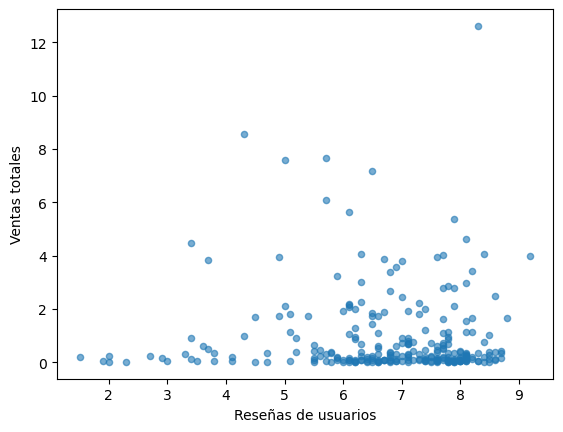

In [82]:
# Correlación entre las reseñas de los usuarios y las ventas totales:
# Hacer el gráfico de dispersión:
ventas_ps4.plot(x="user_score", y="total_sales", kind= "scatter", alpha=0.6, xlabel="Reseñas de usuarios",ylabel="Ventas totales")

# Calcular el coeficiente de correlación:
print(ventas_ps4["user_score"].corr(ventas_ps4["total_sales"]))

0.40656790206178095


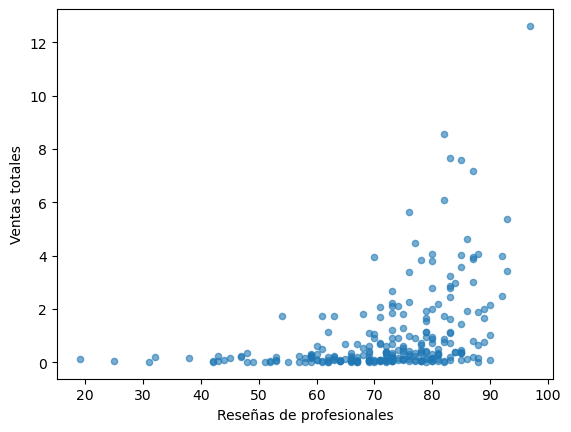

In [83]:
# Correlación entre las reseñas de los profesionales y las ventas totales:
# Hacer el gráfico de dispersión:
ventas_ps4.plot(x="critic_score", y="total_sales", kind= "scatter", alpha=0.6, xlabel="Reseñas de profesionales",ylabel="Ventas totales")

# Calcular el coeficiente de correlación:
print(ventas_ps4["critic_score"].corr(ventas_ps4["total_sales"]))

* Según ambos gráficos y los coeficientes de correlación, podemos inferir que ni las reseñas de los usuarios ni la de los profesionales, tienen relación significativa con las ventas de los juegos en la plataforma PS4. En ninguno de los dos gráficos se ve una relación marcada en donde si la variable x (reseñas) aumenta o disminuye la variable y (ventas) aumenta o disminuye, aunque las reseñas de los profesionales se relacionan más (de forma positiva) con las ventas que las reseñas de los usuarios, pues el gráfico de dispersión nos muestra una tenue línea diagonal creciente y el coeficiente de correlación es de 0.4 (entre más cerca de 1 mayor correlación).

Rentabilidad de las plataformas con el zscore

In [86]:
plataformas_ventas_totales_2016["z_score"] = (plataformas_ventas_totales_2016["total_ventas"]-plataformas_ventas_totales_2016["total_ventas"].mean())/plataformas_ventas_totales_2016["total_ventas"].std()

In [87]:
plataformas_ventas_totales_2016

year_of_release,platform,2010,2011,2012,2013,2014,2015,2016,total_ventas,z_score
0,PS3,142.17,156.78,107.35,113.25,47.76,16.82,3.60,587.73,1.688253
1,X360,170.03,143.84,99.74,88.58,34.74,11.96,1.52,550.41,1.495328
2,PS4,0.00,0.00,0.00,25.99,100.00,118.90,69.25,314.14,0.273936
3,3DS,0.00,63.20,51.36,56.57,43.76,27.78,15.14,257.81,-0.017260
4,Wii,127.95,59.65,21.71,8.59,3.75,1.14,0.18,222.97,-0.197365
5,XOne,0.00,0.00,0.00,18.96,54.07,60.14,26.15,159.32,-0.526402
6,PC,24.28,35.03,23.22,12.38,13.28,8.52,5.25,121.96,-0.719533
7,WiiU,0.00,0.00,17.56,21.65,22.03,16.35,4.60,82.19,-0.925123
8,PSV,0.00,4.63,16.19,10.59,11.90,6.25,4.25,53.81,-1.071833


In [88]:
plataformas_ventas_totales_2016["color"] = ["red" if puntaje <=0 else "green" for puntaje in plataformas_ventas_totales_2016["z_score"]]

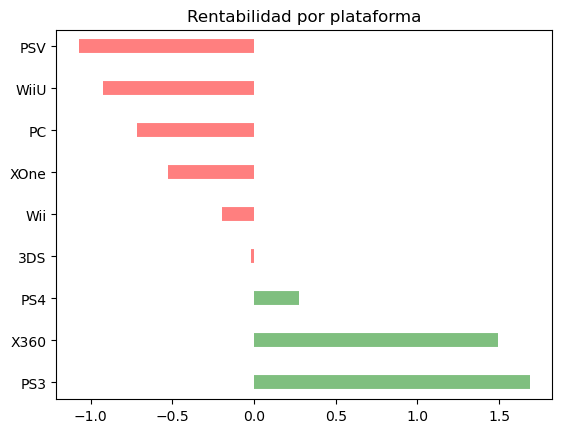

In [89]:
plt.hlines(
    y = plataformas_ventas_totales_2016.platform,
    xmin = 0,
    xmax = plataformas_ventas_totales_2016.z_score,
    color = plataformas_ventas_totales_2016.color,
    linewidth = 10,
    alpha = 0.5,
)

plt.title("Rentabilidad por plataforma")
plt.show()

* El zscore nos muestra que las plataformas más rentables, es decir cuyas ventas están por encima de la media del total de ventas entre el 2010-2016 son PS4, X360 y PS3. Siendo PS3 y X360 las de mejor puntaje (muy similares).

Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [92]:
plataformas_genero = plataformas_ventas_2016.groupby(["genre"])["total_sales"].sum()
plataformas_genero_df = pd.DataFrame(plataformas_genero)
plataformas_genero_df.reset_index(inplace=True)
plataformas_genero_df.sort_values(ascending=False, by="total_sales", inplace=True)
plataformas_genero_df

,genre,total_sales
0,Action,633.63
8,Shooter,477.38
10,Sports,313.34
7,Role-Playing,259.22
3,Misc,212.30
6,Racing,118.43
4,Platform,112.49
2,Fighting,76.32
9,Simulation,61.68
1,Adventure,46.90


In [93]:
plataformas_genero_df["z_score"] = (plataformas_genero_df["total_sales"]-plataformas_genero_df["total_sales"].mean())/plataformas_genero_df["total_sales"].std()

In [94]:
plataformas_genero_df["color"] = ["red" if puntaje <=0 else "green" for puntaje in plataformas_genero_df["z_score"]]

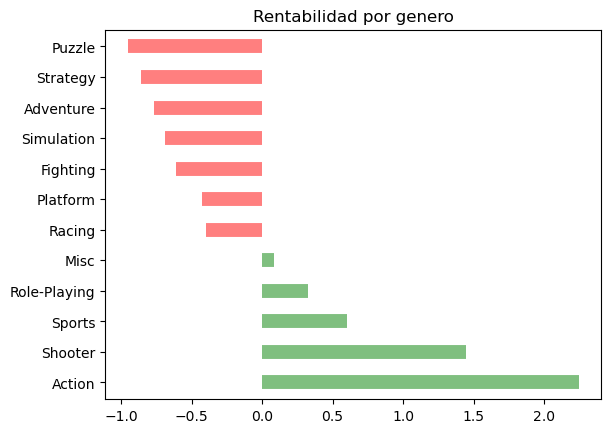

In [95]:
plt.hlines(
    y = plataformas_genero_df.genre,
    xmin = 0,
    xmax = plataformas_genero_df.z_score,
    color = plataformas_genero_df.color,
    linewidth = 10,
    alpha = 0.5,
)

plt.title("Rentabilidad por genero")
plt.show()

* Según nuestro análisis del puntaje zscore los géneros de los juegos con mayor rentabilidad pertenecen a los géneros de acción, tirador, deportivo y juego de roles.En contraste los géneros con menor rentabilidad son los rompecabezas y juegos de estrategia. Pero no podemos generalizar antes de hacer un análisis mas detallados como por ejemplo géneros por regiones de ventas.

Paso 4. Crea un perfil de usuario para cada región
Para cada región (NA, UE, JP) determina:

Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.

In [99]:
ventas_2016_na = plataformas_ventas_2016.groupby(["platform"])["na_sales"].sum()
ventas_2016_na_df = pd.DataFrame(ventas_2016_na)
ventas_2016_na_df.reset_index(inplace=True)
ventas_2016_na_df.sort_values(ascending=False,by="na_sales", inplace=True)

In [100]:
ventas_2016_eu = plataformas_ventas_2016.groupby(["platform"])["eu_sales"].sum()
ventas_2016_eu_df = pd.DataFrame(ventas_2016_eu)
ventas_2016_eu_df.reset_index(inplace=True)
ventas_2016_eu_df.sort_values(ascending=False,by="eu_sales", inplace=True)

In [101]:
ventas_2016_jp = plataformas_ventas_2016.groupby(["platform"])["jp_sales"].sum()
ventas_2016_jp_df = pd.DataFrame(ventas_2016_jp)
ventas_2016_jp_df.reset_index(inplace=True)
ventas_2016_jp_df.sort_values(ascending=False,by="jp_sales", inplace=True)

In [102]:
ventas_plataforma_na_eu = ventas_2016_na_df.merge(ventas_2016_eu_df, on="platform", how="outer")
ventas_plataforma_na_eu_jp = ventas_plataforma_na_eu.merge(ventas_2016_jp_df, on="platform", how="outer")
ventas_plataforma_na_eu_jp

,platform,na_sales,eu_sales,jp_sales
0,X360,334.18,163.41,5.46
1,PS3,229.25,213.59,59.26
2,Wii,121.20,65.91,17.75
3,PS4,108.74,141.09,15.96
4,XOne,93.12,51.59,0.34
5,3DS,82.65,61.27,100.62
6,PC,39.07,68.82,0.00
7,WiiU,38.10,25.13,13.01
8,PSV,12.47,13.07,21.84


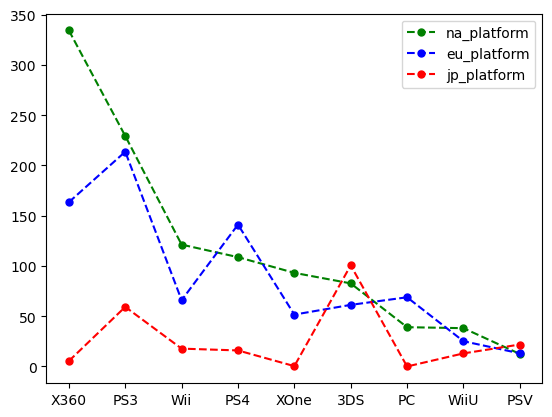

In [103]:
plt.plot(ventas_plataforma_na_eu_jp.platform, ventas_plataforma_na_eu_jp.na_sales, marker="o", linestyle="dashed", color="green", markersize=5)
plt.plot(ventas_plataforma_na_eu_jp.platform, ventas_plataforma_na_eu_jp.eu_sales, marker="o", linestyle="dashed",color="blue", markersize=5,
         )
plt.plot(ventas_plataforma_na_eu_jp.platform, ventas_plataforma_na_eu_jp.jp_sales, marker="o", linestyle="dashed", color="red", markersize=5)
plt.legend(["na_platform","eu_platform","jp_platform"])

* Las 5 principales plataformas en NA son X360, PS3, Wii, PS4 y XOne.
* Las 5 principales plataformas en  EU son PS3, X360, PS4, PC, Wii y 3DS.
* Las 5 principales plataformas en  JP son 3DS, PS3, PSV, Wii y PS4.
* Las plataformas PSV y Wiiu tienen un nivel de ventas muy similar en las tres regiones.
* Las plataformas PS3, Wii y PS4 están en el top 5 de las 3 regiones.

Los cinco géneros principales.

In [106]:
generos_na = plataformas_ventas_2016.groupby(["genre"])["na_sales"].sum()
generos_na_df = pd.DataFrame(generos_na)
generos_na_df.reset_index(inplace=True)
generos_na_df.sort_values(ascending=False,by="na_sales", inplace=True)

In [107]:
generos_eu = plataformas_ventas_2016.groupby(["genre"])["eu_sales"].sum()
generos_eu_df = pd.DataFrame(generos_eu)
generos_eu_df.reset_index(inplace=True)
generos_eu_df.sort_values(ascending=False,by="eu_sales", inplace=True)

In [108]:
generos_jp = plataformas_ventas_2016.groupby(["genre"])["jp_sales"].sum()
generos_jp_df = pd.DataFrame(generos_jp)
generos_jp_df.reset_index(inplace=True)
generos_jp_df.sort_values(ascending=False,by="jp_sales", inplace=True)

In [109]:
ventas_generos_na_eu = generos_na_df.merge(generos_eu_df, on="genre", how="outer")
ventas_generos_na_eu_jp = ventas_generos_na_eu.merge(generos_jp_df, on="genre", how="outer")
ventas_generos_na_eu_jp

,genre,na_sales,eu_sales,jp_sales
0,Action,274.66,224.26,61.78
1,Shooter,235.98,171.04,13.86
2,Sports,151.77,113.13,11.41
3,Misc,114.36,60.79,18.27
4,Role-Playing,98.14,69.02,70.07
5,Platform,51.11,36.07,15.25
6,Racing,43.76,53.40,6.62
7,Fighting,37.68,19.56,11.26
8,Simulation,20.01,24.97,11.74
9,Adventure,17.46,16.51,7.90


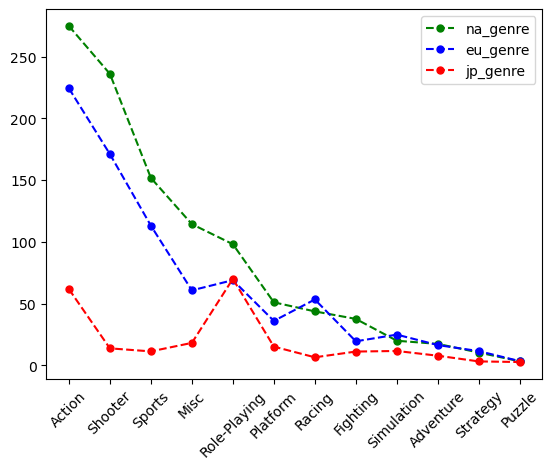

In [110]:
plt.plot(ventas_generos_na_eu_jp.genre, ventas_generos_na_eu_jp.na_sales, marker="o", linestyle="dashed", color="green", markersize=5)
plt.plot(ventas_generos_na_eu_jp.genre, ventas_generos_na_eu_jp.eu_sales, marker="o", linestyle="dashed",color="blue", markersize=5,
         )
plt.plot(ventas_generos_na_eu_jp.genre, ventas_generos_na_eu_jp.jp_sales, marker="o", linestyle="dashed", color="red", markersize=5)
plt.legend(["na_genre","eu_genre","jp_genre"])
plt.tick_params(axis="x", labelrotation=45)



* Los 5 géneros que generan mayores ventas en NA son acción, tirador, deportivo, misc y juego de roles.
* Los 5 géneros que generan mayores ventas en EU son acción, tirador, deportivo, juego de roles y misc.
* Los 5 géneros que generan mayores ventas en JP son juego de roles, acción, misc, plataforma y tirador.
* Los géneros acción, tirador, misc y juego de roles estan en el top 5 en ventas de las 3 regiones.
* La región NA y EU tienen un comportamiento similar en cuanto a los géneros que más generan ventas.

Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [113]:
rating_na = plataformas_ventas_2016.groupby(["rating"])["na_sales"].sum()
rating_na_df = pd.DataFrame(rating_na)
rating_na_df.reset_index(inplace=True)
rating_na_df.sort_values(ascending=False,by="na_sales", inplace=True)

In [114]:
rating_eu = plataformas_ventas_2016.groupby(["rating"])["eu_sales"].sum()
rating_eu_df = pd.DataFrame(rating_eu)
rating_eu_df.reset_index(inplace=True)
rating_eu_df.sort_values(ascending=False,by="eu_sales", inplace=True)

In [115]:
rating_jp = plataformas_ventas_2016.groupby(["rating"])["jp_sales"].sum()
rating_jp_df = pd.DataFrame(rating_jp)
rating_jp_df.reset_index(inplace=True)
rating_jp_df.sort_values(ascending=False,by="jp_sales", inplace=True)

In [116]:
ventas_rating_na_eu = rating_na_df.merge(rating_eu_df, on="rating", how="outer")
ventas_rating_na_eu_jp = ventas_rating_na_eu.merge(rating_jp_df, on="rating", how="outer")
ventas_rating_na_eu_jp

,rating,na_sales,eu_sales,jp_sales
0,M,380.94,291.03,29.79
1,E,241.65,182.29,42.38
2,T,154.95,110.61,36.09
3,E10+,146.09,92.99,11.22
4,tbd,134.44,126.93,114.76
5,EC,0.71,0.00,0.00
6,RP,0.00,0.03,0.00


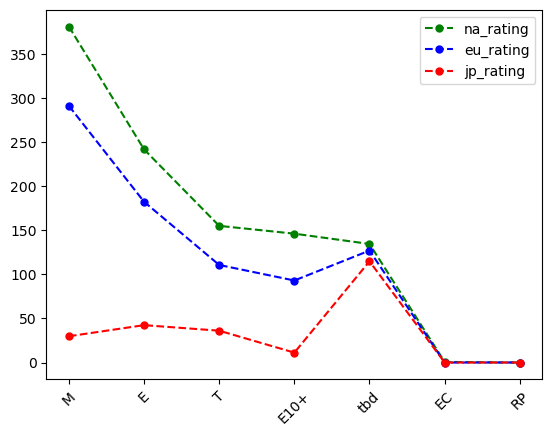

In [117]:
plt.plot(ventas_rating_na_eu_jp.rating, ventas_rating_na_eu_jp.na_sales, marker="o", linestyle="dashed", color="green", markersize=5)
plt.plot(ventas_rating_na_eu_jp.rating, ventas_rating_na_eu_jp.eu_sales, marker="o", linestyle="dashed",color="blue", markersize=5,
         )
plt.plot(ventas_rating_na_eu_jp.rating, ventas_rating_na_eu_jp.jp_sales, marker="o", linestyle="dashed", color="red", markersize=5)
plt.legend(["na_rating","eu_rating","jp_rating"])
plt.tick_params(axis="x", labelrotation=45)


In [118]:
rating_jp_df

,rating,jp_sales
6,tbd,114.76
0,E,42.38
5,T,36.09
3,M,29.79
1,E10+,11.22
2,EC,0.00
4,RP,0.00


* En la región Na los tres juegos con mayores ventas tienen calificaciones en el rating ESRB de M (maduro para + 17 años), E (Todas las edades) y T (adolecentes).
* En la región Eu los tres juegos con mayores ventas tienen calificaciones en el rating ESRB de M (maduro para + 17 años), E (Todas las edades) y Tbd.
* En la región Jp los tres juegos con mayores ventas tienen calificaciones en el rating ESRB de Tbd, E (Todas las edades) y T (adolecentes).
* En las tres regiones los juegos con calificación Tbd tienen ventas casi iguales.
* En las tres regiones la clasificación E (Todas las edades) está en el ranking de las tres clasificaciones que más ventas generan. Se influye que, al ser juegos para todas las edades, más publico tiene acceso a estos juegos, cubriendo un mayor nicho de mercado y generando mayores ventas.




Paso 5. Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Se plantea la hipótesis nula como la hipótesis de la igualdad, partiendo de la información académica sobre el tema. En este caso los datos nos estan mostrando que las medias de las calificaciones de los usuarios para las dos plataformas son muy similares (en valores numéricos), pero ¿estadistícamente son iguales?.

* Hipótesis nula:
Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son iguales.

* Hipótesis alternativa:
Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

In [123]:
# Prueba las hipótesis:
# Tenemos en cuenta que la columna user score tiene datos nulos, 
# que no es lo mismo que decir que el user score es = a 0, por eso solo se toman los datos del user score
# mayores a 0.

from scipy import stats as st
platform_xone_user_score = juegos_despues_2009.query('platform=="XOne" and user_score >0')["user_score"]
platform_pc_user_score =juegos_despues_2009.query('platform=="PC" and user_score >0')["user_score"]
alpha = 0.05
resultado_xone_pc_user_score= st.ttest_ind(platform_xone_user_score, platform_pc_user_score, equal_var=False)
print("p-valor:", resultado_xone_pc_user_score.pvalue)
if resultado_xone_pc_user_score.pvalue < alpha:
    print("rechazamos la hipótesis nula")
else:
    print("no podemos rechazar la hipótesis nula")



p-valor: 0.9801634129117883
no podemos rechazar la hipótesis nula


In [124]:
print(juegos_despues_2009.query('platform=="XOne"')["user_score"].mean())
print(juegos_despues_2009.query('platform=="PC"')["user_score"].mean())

6.521428571428572
6.5181818181818185


* Nuestra prueba de hipótesis confirma que las medias de las calificaciones de los usuarios para las dos plataformas son muy similares y aceptamos la hipótesis nula.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Se plantea la hipótesis nula como la hipótesis de la igualdad, partiendo de la información académica sobre el tema. En este caso los datos nos estan mostrando que las medias para los géneros de Acción y Deportes son diferentes (en valores numéricos), pero ¿estadistícamente son iguales?.

* Hipótesis nula:
Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.

* Hipótesis alternativa:
Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [128]:
# Prueba las hipótesis:
# Tenemos en cuenta que la columna user score tiene datos nulos, 
# que no es lo mismo que decir que el user score es = a 0, por eso solo se toman los datos del user score
# mayores a 0.

from scipy import stats as st
genre_action_user_score = juegos_despues_2009.query('genre=="Action" and user_score >0')["user_score"]
genre_sports_user_score =juegos_despues_2009.query('genre=="Sports"and user_score >0')["user_score"]
alpha = 0.05
genre_action_sports_user_score= st.ttest_ind(genre_action_user_score, genre_sports_user_score, equal_var=False)
print("p-valor:", genre_action_sports_user_score.pvalue)
if genre_action_sports_user_score.pvalue < alpha:
    print("rechazamos la hipótesis nula")
else:
    print("no podemos rechazar la hipótesis nula")



p-valor: 1.8577558919385255e-15
rechazamos la hipótesis nula


In [129]:
print(juegos_despues_2009.query('genre=="Action"')["user_score"].mean())
print(juegos_despues_2009.query('genre=="Sports"')["user_score"].mean())

6.781899871630296
5.902866242038216


* Nuestra prueba de hipótesis confirma que las medias para los géneros de Acción y Deportes son diferentes. Por esto rechazamos la hipótesis nula. 

Conclusiones generales:
* El juego el Grand Theft Auto V esta en las tres plataformas que más ventas han tenido entre el 2010-2015 PS3, X360 y PS4, liderando en ventas.
* Call of Duty: Black Ops II,Call of Duty: Modern Warfare 3, Call of Duty: Black Ops son 3 juegos que están en el ranking 10 de ventas de las plataformas PS3 y x360. 
* Según ambos gráficos y los coeficientes de correlación, podemos inferir que ni las reseñas de los usuarios ni la de los profesionales, tienen relación significativa con las ventas de los juegos en la plataforma PS4.
* El zscore nos muestra que las plataformas más rentables, es decir cuyas ventas están por encima de la media del total de ventas entre el 2010-2016 son PS4, X360 y PS3. Siendo PS3 y X360 las de mejor puntaje (muy similares).
* Las plataformas PSV y Wiiu tienen un nivel de ventas muy similar en las tres regiones.
* Las plataformas PS3, Wii y PS4 están en el top 5 de las 3 regiones.
* Los géneros acción, tirador, misc y juego de roles estan en el top 5 en ventas de las 3 regiones.
* La región NA y EU tienen un comportamiento similar en cuanto a los géneros que más generan ventas.
* En las tres regiones los juegos con calificación Tbd tienen ventas casi iguales.
* En las tres regiones la clasificación E (Todas las edades) está en el ranking de las tres clasificaciones que más ventas generan. Se influye que, al ser juegos para todas las edades, más publico tiene acceso a estos juegos, cubriendo un mayor nicho de mercado y generando mayores ventas.
* Nuestra prueba de hipótesis confirma que las medias de las calificaciones de los usuarios para las dos plataformas son muy similares y aceptamos la hipótesis nula.
* Nuestra prueba de hipótesis confirma que las medias para los géneros de Acción y Deportes son diferentes. Por esto rechazamos la hipótesis nula.
